In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Load the dataset
file_path = 'bank.csv'
data = pd.read_csv(file_path, delimiter=';', quotechar='"')

# Encode categorical variables
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le


In [4]:
# Split data into features (X) and target (y)
X = data.drop(columns=['y'])
y = data['y']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Initialize and train the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42, max_depth=4)  # Limit depth for clearer visualization
dt_classifier.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [6]:
# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)


Accuracy: 0.8931466470154753
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      1205
           1       0.54      0.34      0.42       152

    accuracy                           0.89      1357
   macro avg       0.73      0.65      0.68      1357
weighted avg       0.88      0.89      0.88      1357



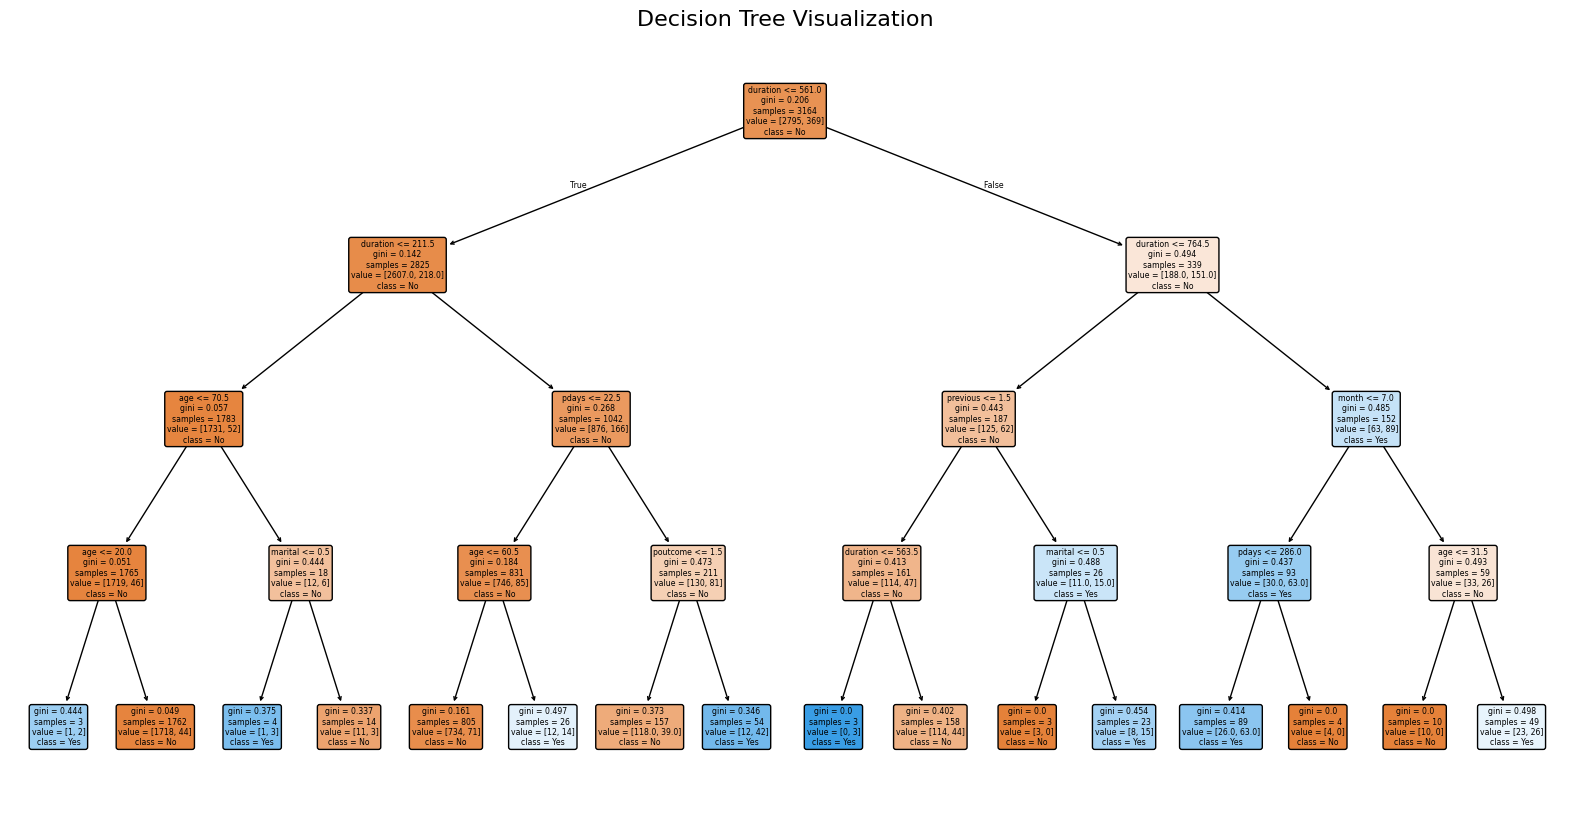

In [7]:
# Convert feature names to a list
feature_names_list = list(X.columns)

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier, 
    feature_names=feature_names_list, 
    class_names=["No", "Yes"], 
    filled=True, 
    rounded=True
)
plt.title("Decision Tree Visualization", fontsize=16)
plt.show()


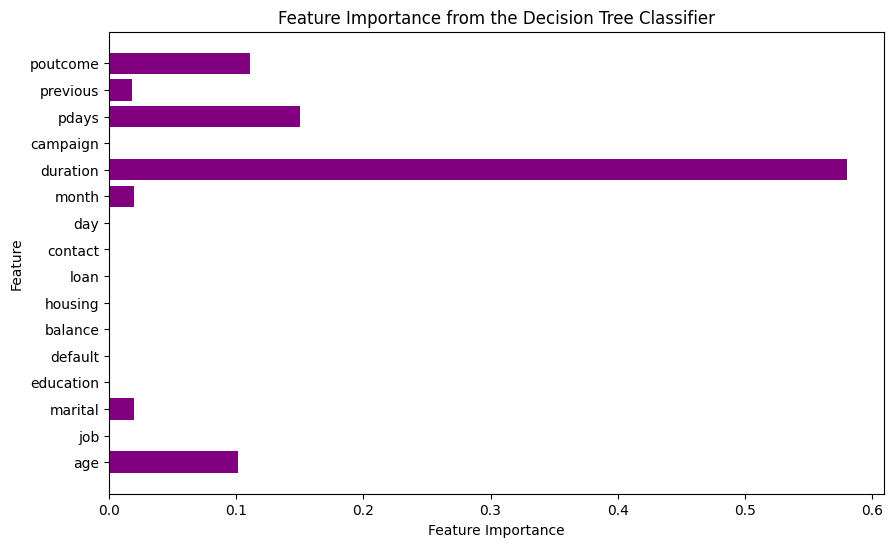

In [8]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_names_list, dt_classifier.feature_importances_, color='purple')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from the Decision Tree Classifier')
plt.show()


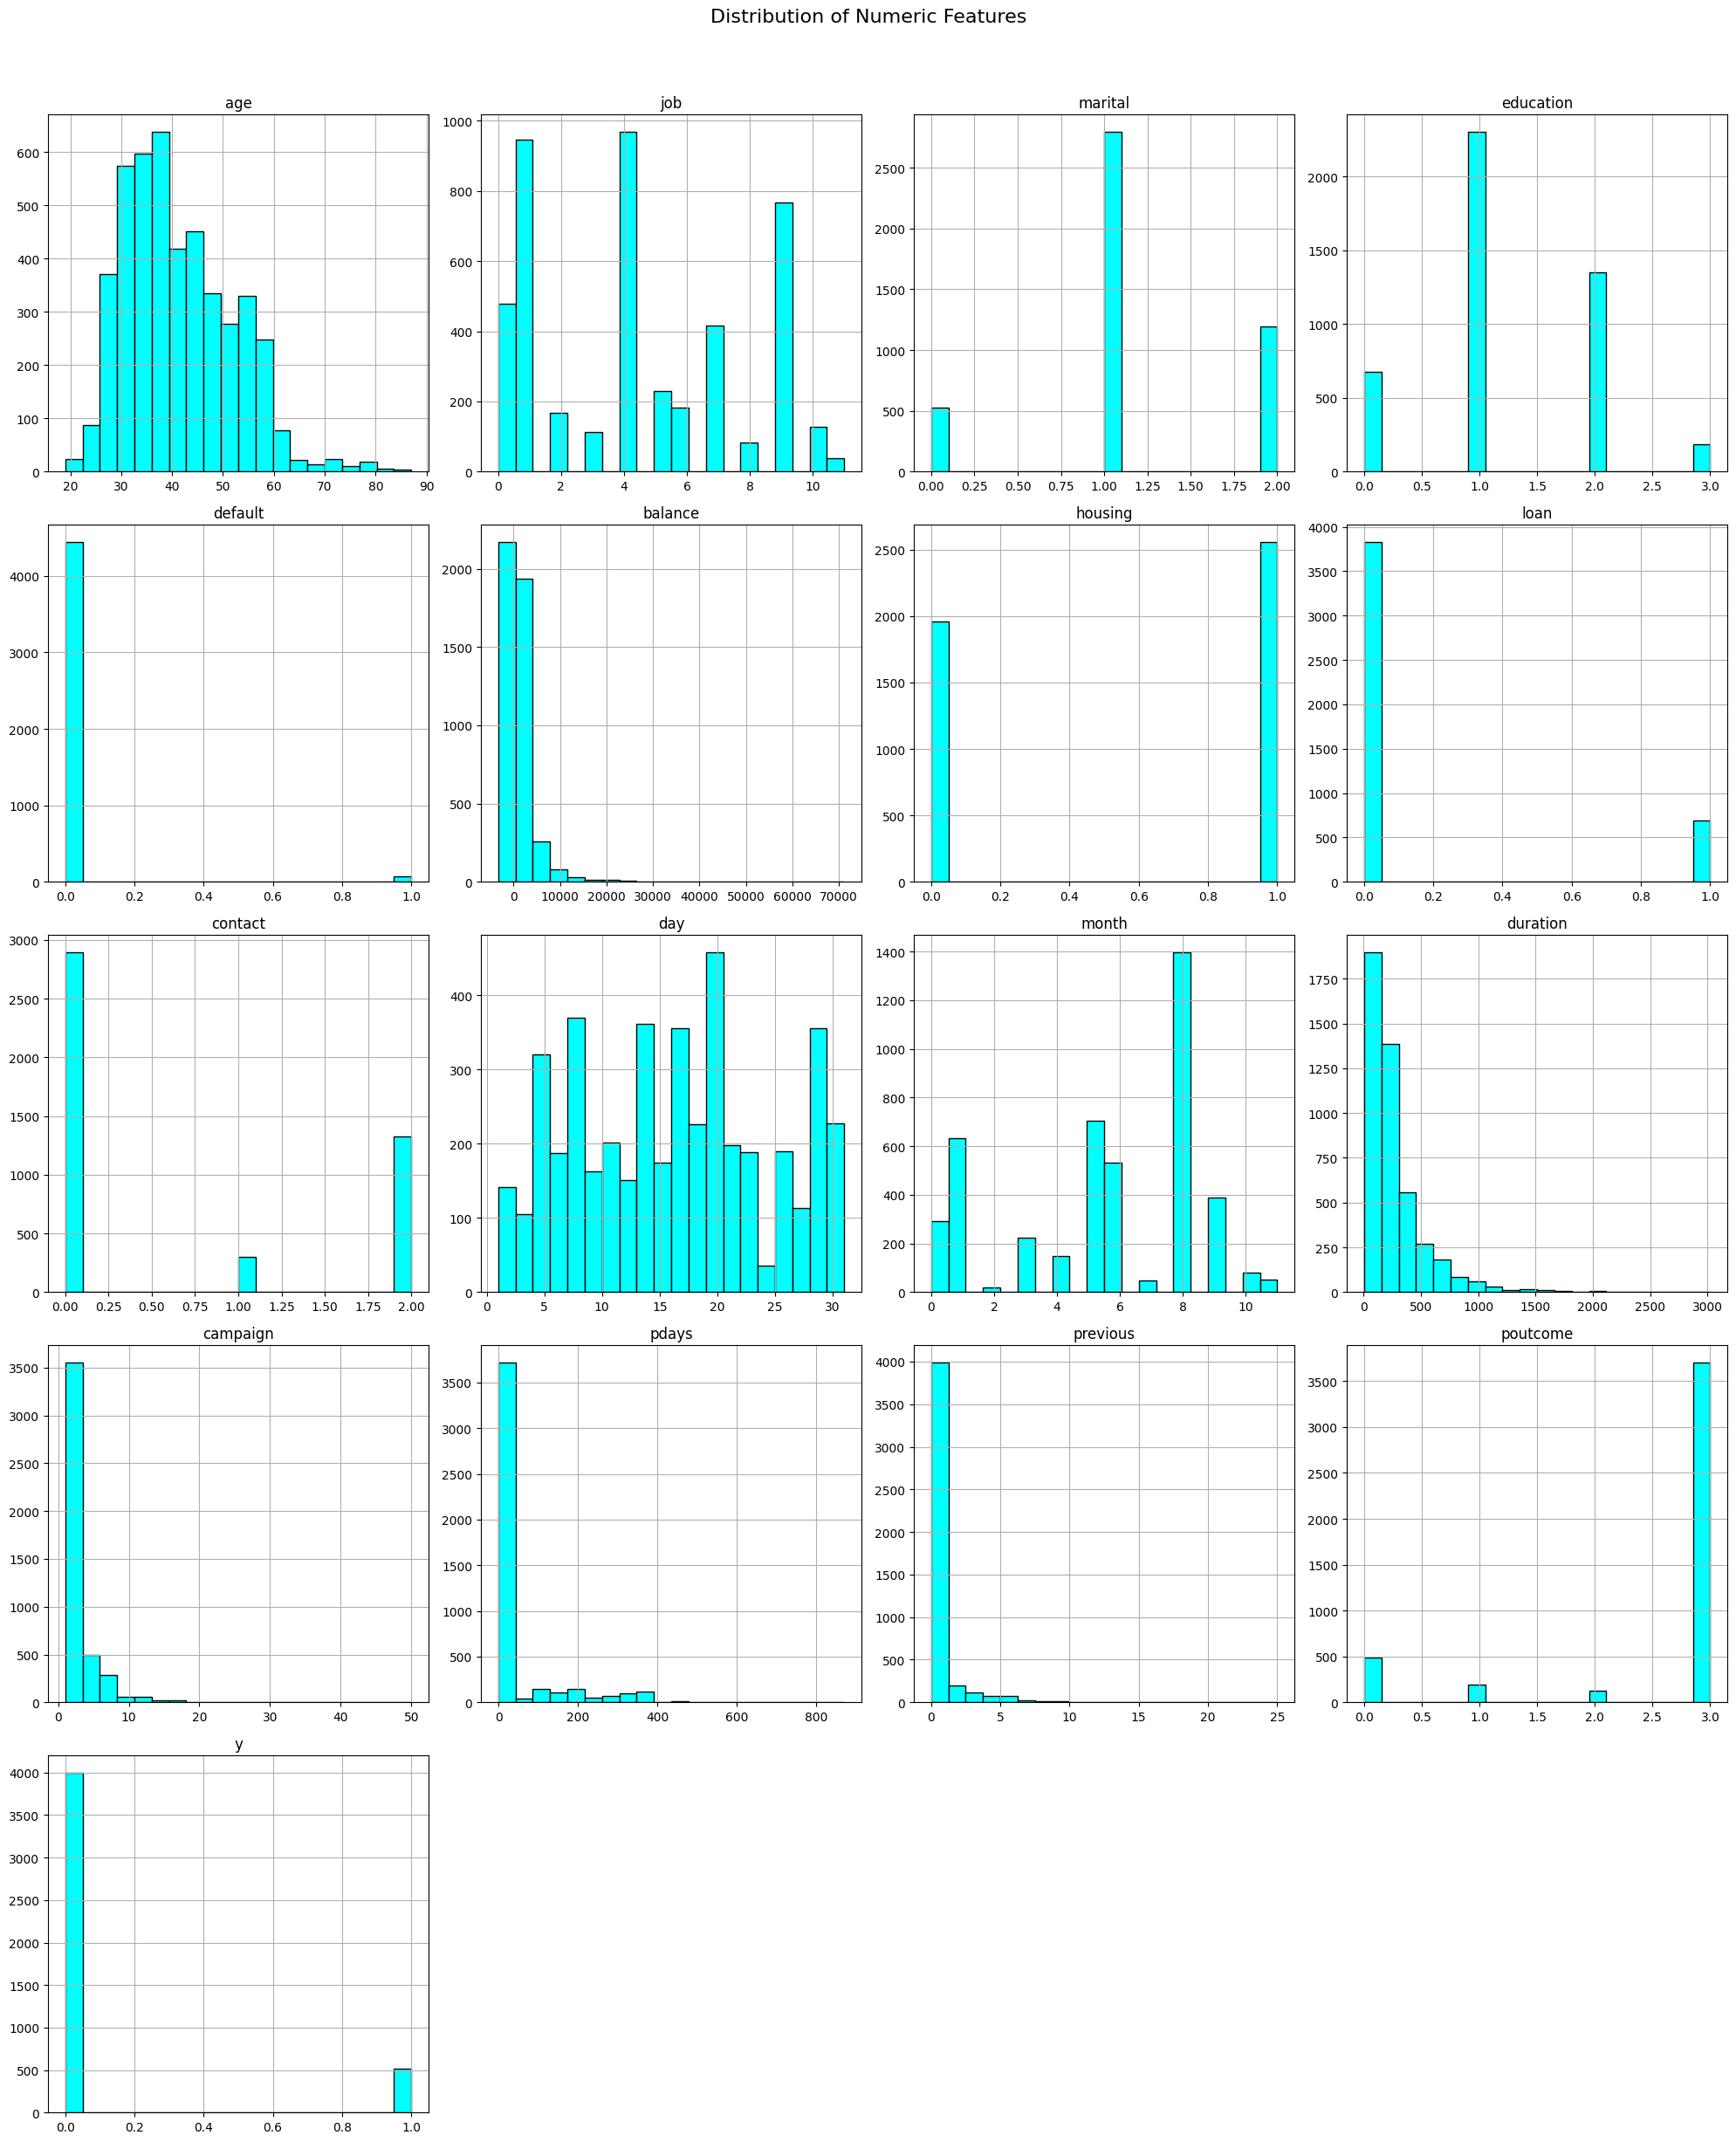

In [11]:
# Visualize the distribution of numeric features
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate appropriate layout for the histograms
n_cols = 4
n_rows = (len(numeric_columns) // n_cols) + (len(numeric_columns) % n_cols != 0)

# Plot histograms for each numeric column
data[numeric_columns].hist(bins=20, figsize=(n_cols * 5, n_rows * 5), layout=(n_rows, n_cols), color='cyan', edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


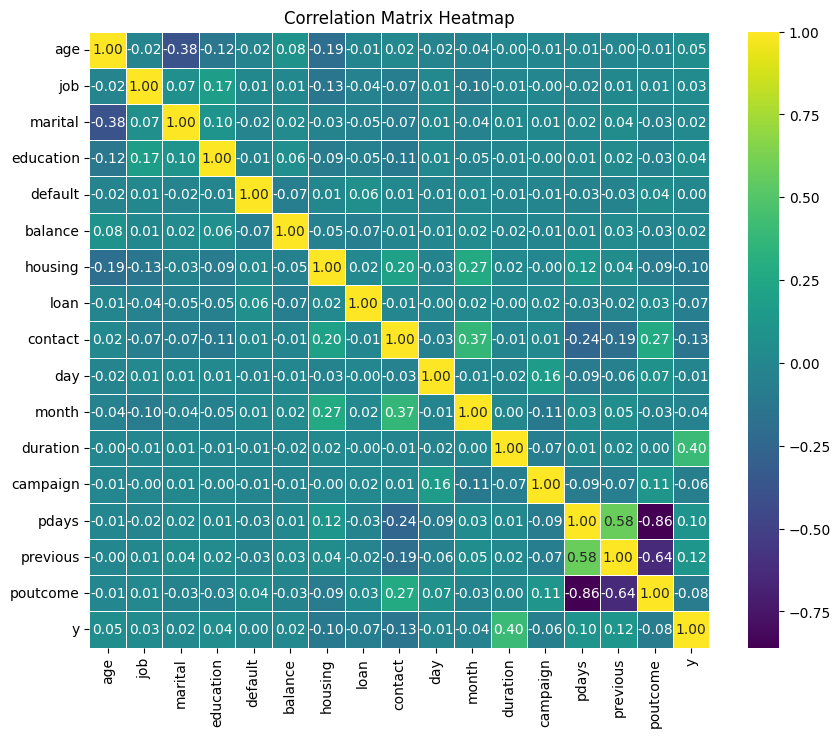

In [12]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


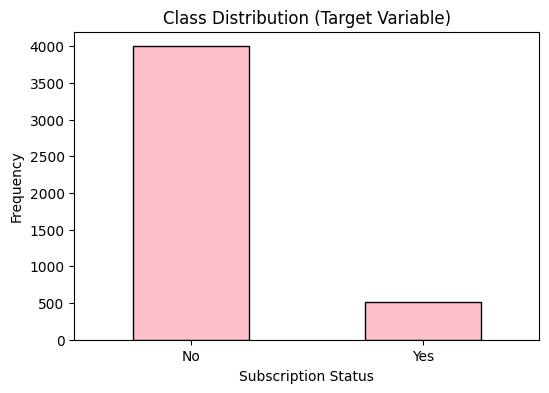

In [13]:
# Plot class distribution
plt.figure(figsize=(6, 4))
y.value_counts().plot(kind='bar', color='pink', edgecolor='black')
plt.xticks([0, 1], ['No', 'Yes'], rotation=0)
plt.xlabel('Subscription Status')
plt.ylabel('Frequency')
plt.title('Class Distribution (Target Variable)')
plt.show()


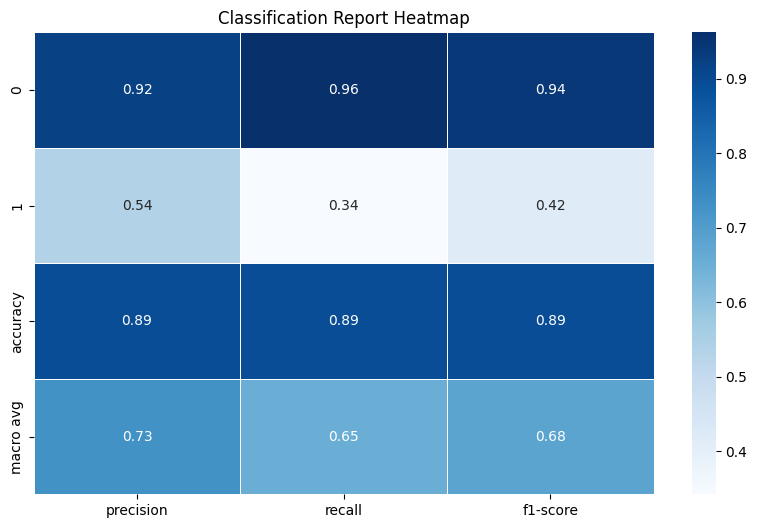

In [14]:
# Convert classification report into a DataFrame for visualization
classification_rep_df = pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)).T

# Plot the classification report metrics
plt.figure(figsize=(10, 6))
sns.heatmap(classification_rep_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Classification Report Heatmap')
plt.show()
